In [1]:
import T4sigWGAN as T4
from torch.utils.data import DataLoader, random_split

In [2]:
total_dataset = T4.StockTimeSeriesDataset()
train_size = int(0.9 * len(total_dataset))  # 90% for training
val_size = len(total_dataset) - train_size  # 10% for validation
train_dataset, val_dataset = random_split(total_dataset, [train_size, val_size])
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=False, num_workers=2, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2, drop_last=True)

In [3]:
Encoder = T4.LogSigRNNDecoder(**T4.encoder_config).to(T4.args.device)
Decoder = T4.TimesFormerDecoder(**T4.decoder_config).to(T4.args.device)
Supervisor = T4.ModernTCN(T4.supervisor_config).to(T4.args.device)
Generator = T4.LogSigRNNGenerator(**T4.logsig_config).to(T4.args.device)
Discriminator = T4.tailGANDiscriminator(T4.discriminator_config).to(T4.args.device)
model = T4.T4sigWGAN(Encoder, Decoder, Generator, Supervisor, Discriminator).to(T4.args.device)
trainer = T4.FinetuneTrainer(T4.args, model, train_dataloader, val_dataloader)

Total Parameters: 22759902


T4sigWGAN EP_train:0:   0%|| 0/25 [00:00<?, ?it/s]C:\Users\USER\anaconda3\envs\myenv\lib\site-packages\torch\nn\modules\conv.py:294: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  ..\aten\src\ATen\native\Convolution.cpp:660.)
  return F.conv1d(input, weight, bias, self.stride,
T4sigWGAN EP_valid:1: 100%|| 2/2 [00:02<00:00,  1.21s/it]


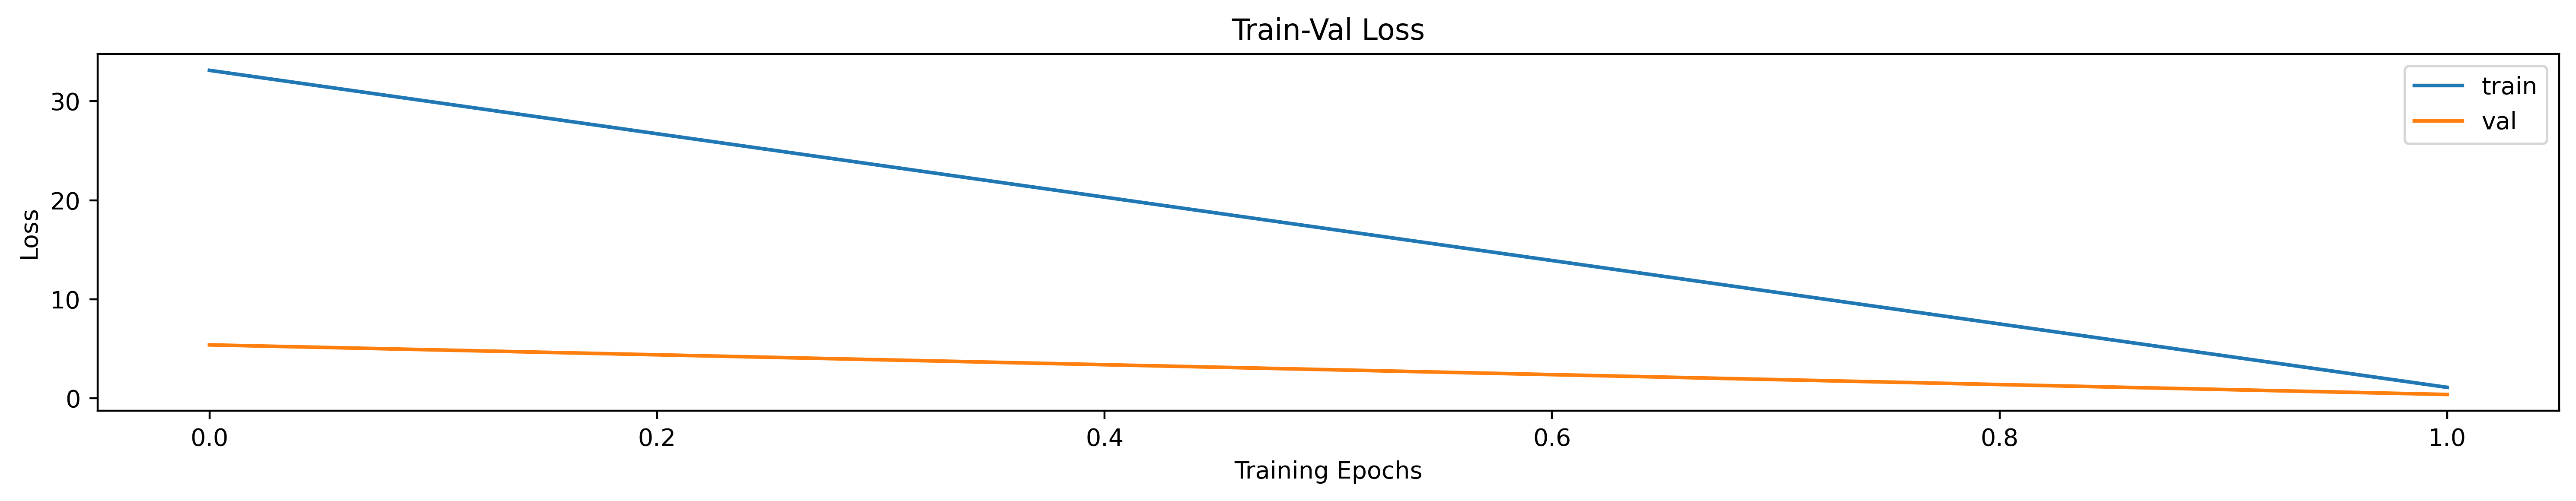

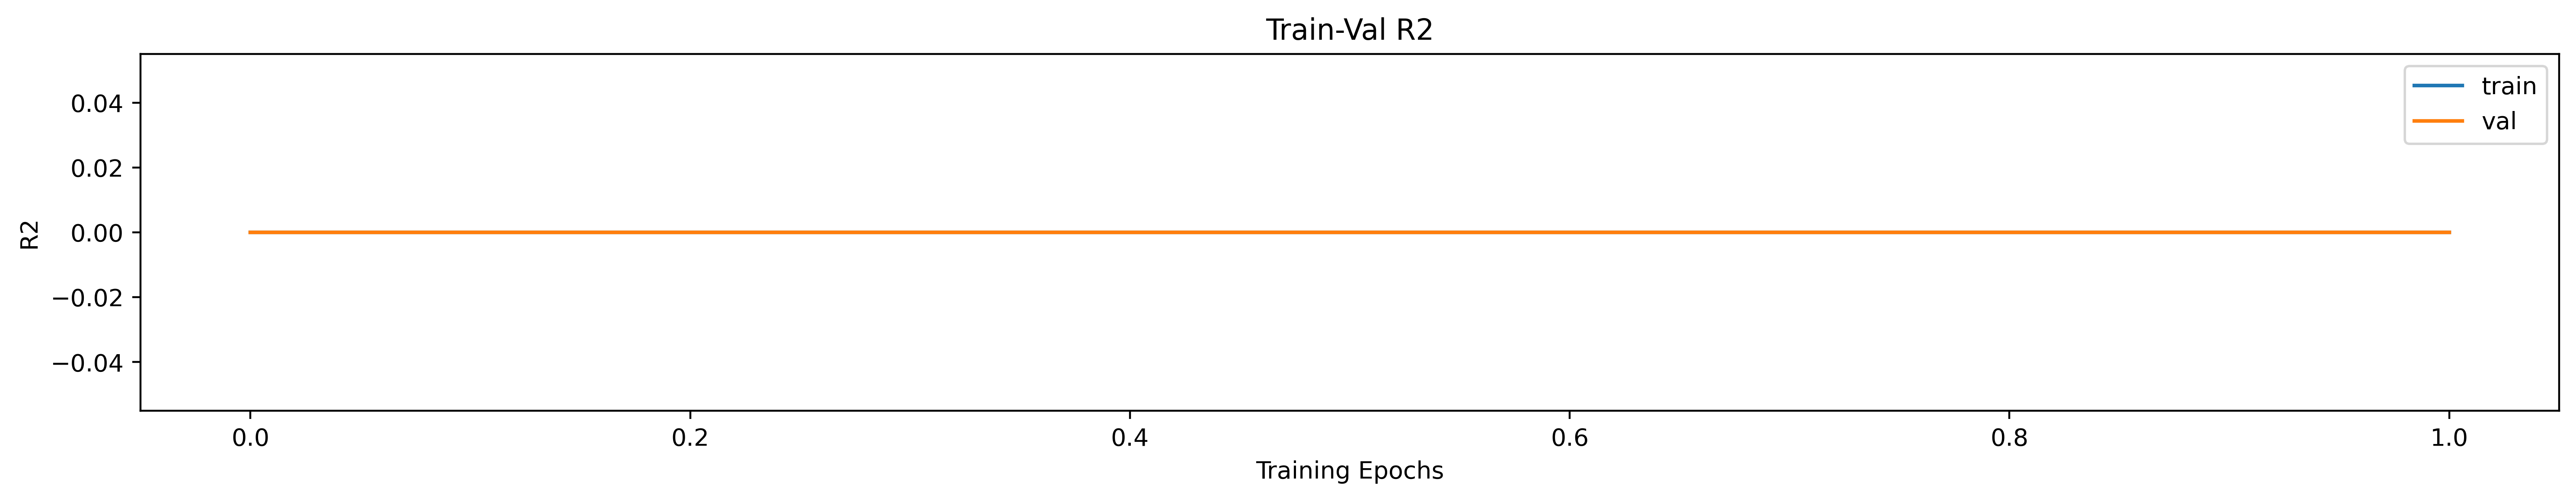

In [4]:
stage = "Pretrain_1"

# model training
for epoch in range(T4.args.epochs):
    trainer.train(epoch, stage)
    val_loss = trainer.valid(epoch, stage)

# train log image save
trainer.evaluate()

In [ ]:
trainer.train_hist

In [ ]:
stage = "Pretrain_2"

# model training
for epoch in range(T4.args.epochs):
    trainer.train(epoch, stage)
    val_loss = trainer.valid(epoch, stage)

# train log image save
trainer.evaluate()

In [ ]:
stage = "Finetune"

# model training
for epoch in range(T4.args.epochs):
    trainer.train(epoch, stage)
    val_loss = trainer.valid(epoch, stage)

# train log image save
trainer.evaluate()

In [ ]:
# metric_iteration = 5
#
# discriminative_score = list()
# for _ in range(metric_iteration):
#     temp_disc = T4.discriminative_score_metrics(ori_data, generated_data)
#     discriminative_score.append(temp_disc)
#
# print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))
#
#
# predictive_score = list()
# for tt in range(metric_iteration):
#     temp_pred = T4.predictive_score_metrics(ori_data, generated_data)
#     predictive_score.append(temp_pred)
#
# print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))
#
#
# T4.visualization(ori_data, generated_data, 'pca')
# T4.visualization(ori_data, generated_data, 'tsne')